### OpSim Data files
This notebook is to read OpSim output file and plot some columns just to learn how to work with its output file.
The OpSim output files can be obtained from LSST website here: http://astro-lsst-01.astro.washington.edu:8081/ 

Information about the OpSim runs is at: https://github.com/lsst-pst/survey_strategy/raw/master/db/baseline-doc/baseline.pdf

Also, here is an example for how to read the data files: https://github.com/lsst-pst/survey_strategy/blob/master/db/MeanRADec.ipynb

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as mb

In [3]:
opsdb = db.OpsimDatabase('minion_1016_newsky.db')

In [80]:
#opsdb.columnNames

In [22]:
simdata = opsdb.query_columns(opsdb.defaultTable, 
                              colnames=['fieldRA', 'fieldDec', 'filter', 'night', 'visitTime', 'airmass'], 
                              sqlconstraint=None)

In [59]:
ra_array      = np.zeros(len(simdata))
dec_array     = np.zeros(len(simdata))
airmass_array = np.zeros(len(simdata))
time_array    = np.zeros(len(simdata))
night_array   = np.zeros(len(simdata))

# creating empty array for strings
val           = [''] * len(simdata)
filter_array  = np.array(val)

for i in range(len(simdata)):
    ra_array[i]      = simdata[i][0]
    dec_array[i]     = simdata[i][1]
    filter_array[i]  = simdata[i][2]
    night_array[i]   = simdata[i][3]
    time_array[i]    = simdata[i][4]
    airmass_array[i] = simdata[i][5]

#### Plotting various columns vs. one another just to test

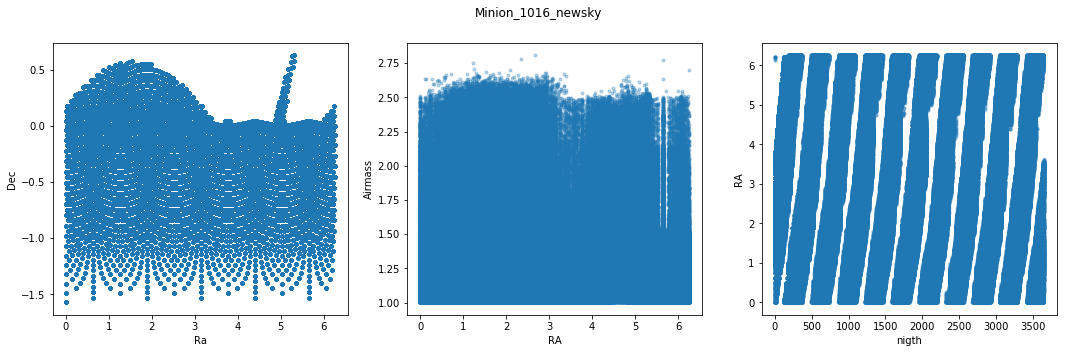

In [48]:
plt.figure(1, figsize=(18,5))

plt.subplot(131)
plt.plot(ra_array, dec_array, ".", alpha=0.3)
plt.xlabel("Ra")
plt.ylabel("Dec")

plt.subplot(132)
plt.plot(ra_array, airmass_array, ".", alpha=0.3)
plt.xlabel("RA")
plt.ylabel("Airmass")

plt.subplot(133)
plt.plot(night_array, ra_array, ".", alpha=0.3)
plt.xlabel("nigth")
plt.ylabel("RA")

plt.suptitle("Minion_1016_newsky")

### Counting visits in each filter

In [61]:
from collections import Counter
counts = Counter(filter_array)

count_vals = np.array([counts['u'], counts['g'], counts['r'], counts['i'], counts['z'], counts['y']])
labels     = np.array(['u', 'g', 'r', 'i', 'z', 'y'])

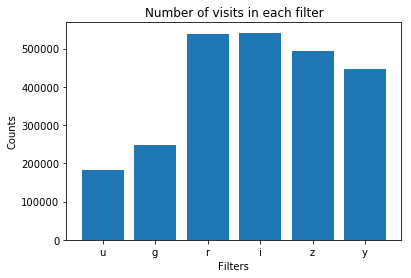

In [78]:
plt.bar(np.arange(len(counts)), count_vals, tick_label=labels)
plt.xlabel("Filters")
plt.ylabel("Counts")
plt.title("Number of visits in each filter")